# EUKARYA

In [33]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [34]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [35]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [36]:
# import data
denoisetable_eu = q2.Artifact.load('./results/denoisetable_eu.qza')
rep_seqs_eu = q2.Artifact.load('./results/rep_seqs_eu.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [37]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_eu,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-pir34yi7/33b1e814-210e-47dd-9824-63d73873857a/data/dna-sequences.fasta



inputfile = orig
578 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  501 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  570 / 578
done.

Progressive alignment 1/2... 
STEP    68 / 577 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

Making a distance matrix from msa.. 
  500 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  570 / 578
done.

Progressive alignment 2/2... 
STEP   470 / 577 (thread    0) h
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --aut

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-fev8st30/b70172a9-f0f0-4586-a9cc-bef8d7b96c6b/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-fev8st30/b70172a9-f0f0-4586-a9cc-bef8d7b96c6b/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.10 seconds: Top hits for    435 of    578 seqs (at seed    400)
      0.23 seconds: Joined    100 of    575
      0.37 seconds: Joined    300 of    575
      0.52 seconds: Joined    500 of    575
Initial topology in 0.56 seconds
Refining topology: 37 rounds ME-NNIs, 2 rounds ME-SPRs, 18 rounds ML-NNIs
      0.62 seconds: ME NNI round 3 of 37, 301 of 576 splits, 23 changes (max delta 0.004)
      0.80 seconds: SPR round   1 of   2, 201 of 1154 nodes
      0.98 seconds: SPR round   1 of   2, 401 of 1154 nodes
      1.15 seconds: SPR round   1 of   2, 601 of 1154 nodes
      1.

## ALPHA AND BETA DIVERSITY

In [38]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_eu,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 3376c556-c787-405d-beab-ebc9b18bb67e>

In [39]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_eu,
#     max_depth = 30000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [40]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_30000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_30000.qzv')

In [41]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/eu_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [42]:
from qiime2.plugins.taxa.methods import filter_seqs, filter_table
taxonomy = q2.Artifact.load('./results/taxonomy_sklearn.qza')
# fiter denoisetable_eu, remove Vertebrata

denoisetable_eu_filtered = filter_table(
    table = denoisetable_eu,
    taxonomy = taxonomy, 
    exclude = 'p__Vertebrata'
)

In [43]:
# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_eu_filtered.filtered_table,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 31f830a1-0a12-4537-8973-c59a900ff947>

In [44]:
# set sampling_depth based on alpha rarefacation curve
depth = 1008
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_eu_filtered.filtered_table,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-tbkwp7pi/10e17386-dff0-423b-bd6d-9cee50ecec87/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-305f15xj

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-tbkwp7pi/10e17386-dff0-423b-bd6d-9cee50ecec87/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-aiq2hsvf

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5.933321680332297e-06 and the largest is 1.384158016932473.
  warn(


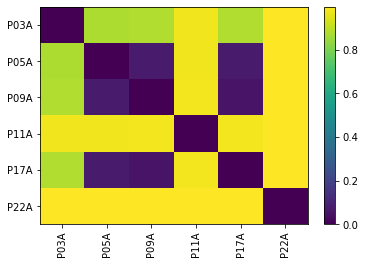

In [45]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

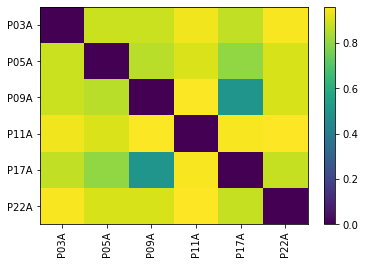

In [46]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [49]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 49d88b8f-8382-46c4-a9e1-f383b1c8dff2>

In [50]:
alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
    table = denoisetable_eu_filtered.filtered_table,
    phylogeny = rooted_tree,
    max_depth = depth,
    metadata = sample_metadata,
    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
    steps =  100
)
alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

'./results/alpha_diversity_new.qzv'

In [51]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_diversity_new.qzv')
alpha_rar

<visualization: Visualization uuid: 19323e7f-c280-497a-9ca2-8c0381d2edfc>

In [52]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

chao1   simpson  simpson_e  observed_features  dominance
Sample ID                                                          
P03A        18.0  0.819935   0.370236               15.0   0.180065
P05A         4.0  0.137111   0.289725                4.0   0.862889
P09A         4.0  0.104887   0.279294                4.0   0.895113
P11A        19.0  0.873473   0.415970               19.0   0.126527
P17A         2.0  0.001982   0.500993                2.0   0.998018
P22A         7.0  0.539964   0.310535                7.0   0.460036

In [53]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
# ndf["color"] = ndf.groupby("population").ngroup()
# ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [54]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

year               population  value               type
P03A  2015  Linija reke Ljubljanice   15.0  observed_features
P05A  2016         Dolenjska linija    4.0  observed_features
P09A  2019  Linija reke Ljubljanice    4.0  observed_features
P11A  2018  Linija reke Ljubljanice   19.0  observed_features
P17A  2019  Linija reke Ljubljanice    2.0  observed_features
P22A  2020            Črna podvrsta    7.0  observed_features
P03A  2015  Linija reke Ljubljanice   18.0              chao1
P05A  2016         Dolenjska linija    4.0              chao1
P09A  2019  Linija reke Ljubljanice    4.0              chao1
P11A  2018  Linija reke Ljubljanice   19.0              chao1
P17A  2019  Linija reke Ljubljanice    2.0              chao1
P22A  2020            Črna podvrsta    7.0              chao1

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/eukarya_obs-feat_chao1.png


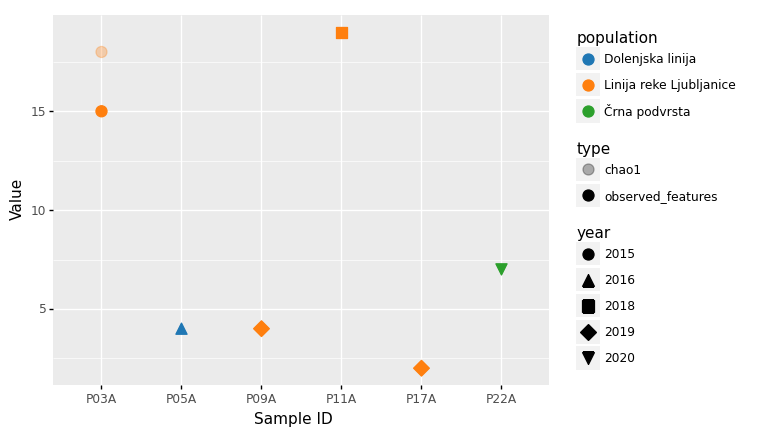

<ggplot: (8728297096253)>

In [55]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
)

p.save('./results/eukarya_obs-feat_chao1.png')

p

In [56]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/eukarya_shannon.png')
# shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/eukarya_simpson_e.png


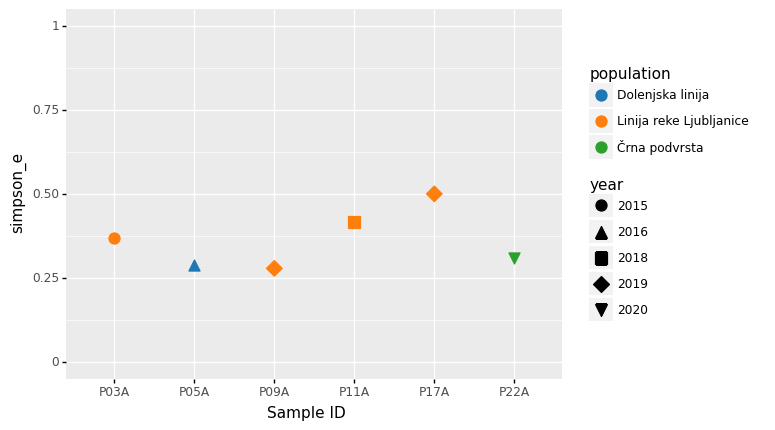

<ggplot: (8728134093650)>

In [57]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/eukarya_simpson_e.png')
simpson 

In [58]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [59]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [60]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [61]:
# 2016 falls out
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu,
    metadata = sample_metadata,
    where = "[year] IN ('2015','2019')"
)

In [62]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 14448
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-2i6e1v_x/7a332d79-0662-44c5-9629-c12f0bbdfb86/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-h80tc9_o

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-2i6e1v_x/7a332d79-0662-44c5-9629-c12f0bbdfb86/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-1rneh0jh

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0010225895739259072 and the largest is 0.3118779114926576.


In [63]:
depth = 14448
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-rcp0khm8/77670ec6-51d5-4edc-8700-78725d29ba40/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-h5uuxv5q

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-rcp0khm8/77670ec6-51d5-4edc-8700-78725d29ba40/data/feature-table.biom -t /tmp/qiime2-archive-rulxt_29/34f11e47-7ab2-4a44-b40b-d338b7f55b48/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-bzw1w8y_

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0007063636315206558 and the largest is 0.25395646262282084.


#### PERMANOVA

In [64]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: c9c33c7b-9f4f-43c6-b512-1ae56a867f6d>

<Figure size 432x288 with 0 Axes>

In [65]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: e221d434-8fa3-4ccf-ac4b-2ba8d9cd0f31>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [66]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: e887136c-2ec2-48b9-8830-6425d9106b57>

<Figure size 432x288 with 0 Axes>

In [67]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 4b2f8934-31fa-4dd7-9a71-1b641c6f7477>

<Figure size 432x288 with 0 Axes>